# WeatherPy

## Generate Cities List

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [153]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['chuy', 'ushuaia', 'airai', 'saint-philippe', 'sorland', 'parana', 'rikitea', 'illoqqortoormiut', 'avarua']


In [154]:
#only need to unhash if you need to run again, otherwise, it'll keep adding to the list
new_cities= []

for x in cities:
    y = x.replace(' ','+')
    new_cities.append(y)
new_cities

['chuy',
 'ushuaia',
 'airai',
 'saint-philippe',
 'sorland',
 'parana',
 'rikitea',
 'illoqqortoormiut',
 'avarua']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [165]:
Max_temp= []
Lat = []
Lon= []
Cloudiness = []
Humidity = []
Windspeed = []
Country = []

url = "http://api.openweathermap.org/data/2.5/weather?"
num = 0

for x in new_cities:
    city = x
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url).json()
          
    try:
        num = num + 1
        Max_temp.append(weather_response['main']['temp_max'])
        Lat.append(weather_response['coord']['lat'])
        Lon.append(weather_response['coord']['lon'])
        Cloudiness.append(weather_response['clouds']['all'])
        Humidity.append(weather_response['main']['humidity'])
        Windspeed.append(weather_response['wind']['speed'])
        Country.append(weather_response['sys']['country'])
        print(f"{num} | Processing {city}.") 
        
    except (KeyError, IndexError):
        num = num + 1
        Max_temp.append('NaN')
        Lat.append('NaN')
        Lon.append('NaN')
        Cloudiness.append('NaN')
        Humidity.append('NaN')
        Windspeed.append('NaN')
        Country.append('NaN')
        print(f"{num} | Missing {city}, skipping.")

1 | Processing chuy.
2 | Processing ushuaia.
3 | Processing airai.
4 | Processing saint-philippe.
5 | Processing sorland.
6 | Processing parana.
7 | Processing rikitea.
9 | Missing illoqqortoormiut, skipping.
10 | Processing avarua.


In [ ]:
cities_dict= {}
cities_dict= {"Cities": cities,
    "Country": Country,
    "Max_temp": Max_temp,
    "Lat": Lat,
    "Lon": Lon,
    "Cloudiness": Cloudiness,
    "Humidity": Humidity,
    "Windspeed": Windspeed}

In [174]:
cities_data = pd.DataFrame(cities_dict)
cities_data.dtypes

Cities        object
Country       object
Max_temp      object
Lat           object
Lon           object
Cloudiness    object
Humidity      object
Windspeed     object
dtype: object

In [176]:
cities_data.dropna(inplace=True)

In [177]:
cities_data["Max_temp"]

,Cities,Country,Max_temp,Lat,Lon,Cloudiness,Humidity,Windspeed
0,chuy,UY,79.84,-33.69,-53.46,80,93,4.97
1,ushuaia,AR,57.2,-54.81,-68.31,75,58,18.34
2,airai,TL,69.76,-8.93,125.41,68,92,1.61
3,saint-philippe,CA,14.54,45.36,-73.48,75,72,9.17
4,sorland,NO,33.8,67.67,12.69,40,54,25.28
5,parana,BR,83.17,-7.52,-72.89,24,80,3.62
6,rikitea,PF,79.97,-23.12,-134.97,100,97,11.01
7,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,avarua,CK,77,-21.21,-159.78,40,83,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

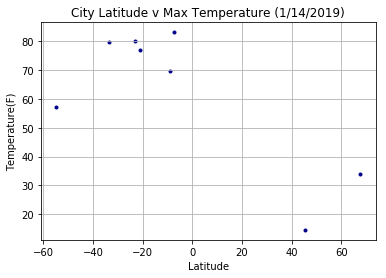

In [194]:
Lat = cities_data["Lat"]
Temp = cities_data["Max_temp"]
plt.scatter(Lat, Temp, marker=".", c= 'darkblue')
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("City Latitude v Max Temperature (1/14/2019)")
plt.grid()

#### Latitude vs. Humidity Plot

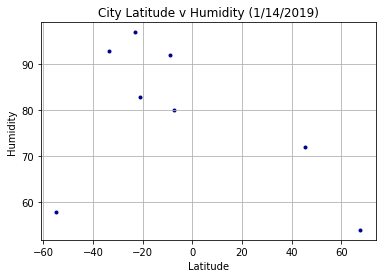

In [195]:
Humid = cities_data["Humidity"]
plt.scatter(Lat, Humid, marker=".", c= 'darkblue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude v Humidity (1/14/2019)")
plt.grid()

#### Latitude vs. Cloudiness Plot

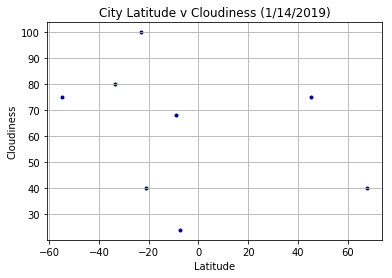

In [196]:
Clouds = cities_data["Cloudiness"]
plt.scatter(Lat, Clouds, marker=".", c= 'darkblue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude v Cloudiness (1/14/2019)")
plt.grid()

#### Latitude vs. Wind Speed Plot

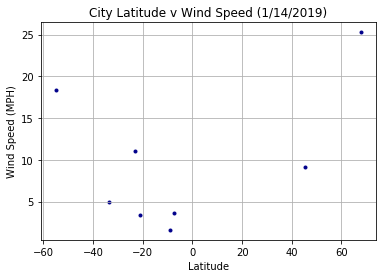

In [197]:
W_speed = cities_data["Windspeed"]
plt.scatter(Lat, W_speed, marker=".", c= 'darkblue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude v Wind Speed (1/14/2019)")
plt.grid()